# To Explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Import dataset
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

print("First 5 rows of the Dataset index starting with 0")
dataset.head(5)

First 5 rows of the Dataset index starting with 0


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
print("Number of rows and columns")
dataset.shape

Number of rows and columns


(25, 2)

In [4]:
print("Summary statistics for numerical columns")
dataset.describe()

Summary statistics for numerical columns


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Data Visualization

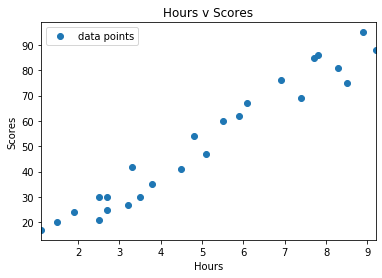

In [5]:
dataset.plot(x='Hours' , y='Scores', style='o',label='data points')
plt.title('Hours v Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

### Dividing data into inputs and labels

In [6]:
# x representing hours and y representing scores
# Including all the columns except the last
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

### Splitting dataset into training set and test set using Scikit Learn


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

## 1. Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Training model on training dataset
regressor.fit(x_train,y_train)

#Vector of predicted value of test set
y_pred = regressor.predict(x_test)

#Vector of predicted value of train set
y_train_pred = regressor.predict(x_train)



### Plotting Regression line on training set


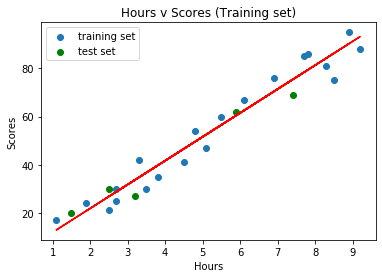

In [9]:
plt.scatter(x_train ,y_train,label='training set')
plt.plot(x_train ,y_train_pred, color = 'red')
plt.scatter(x_test ,y_test, color='green', label='test set')
plt.title('Hours v Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

### Plotting Regression line on test set

### Making Predictions

In [10]:
print("Comparing actual value of test set with the predicted")
df=pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['Hours','Actual','Predicted'])
df['Deviation']=abs(df['Actual']-df['Predicted'])
df

Comparing actual value of test set with the predicted


,Hours,Actual,Predicted,Deviation
0,1.5,20.0,16.884145,3.115855
1,3.2,27.0,33.732261,6.732261
2,7.4,69.0,75.357018,6.357018
3,2.5,30.0,26.794801,3.205199
4,5.9,62.0,60.491033,1.508967


In [11]:
#Predicted score if a student study for 9.25 hrs
hrs=9.25
pred_score=regressor.predict([[hrs]])
print("Hours",hrs)
print("Predicted Score", pred_score)


Hours 9.25
Predicted Score [93.69173249]


### Regression Analysis and Evaluation of Model

#### R Square and Mean Square Error

In [12]:
pred_all_y = regressor.predict(x);

from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
r2=r2_score(y_test,y_pred)
rsm=np.sqrt(mean_squared_error(y_test, y_pred))
mean_abs_error=mean_absolute_error(y_test,y_pred)
print("R Sq: ", r2)
print("Mean Absolute Error", mean_abs_error)
print("Root Squared Error: ",rsm)

R Sq:  0.9454906892105356
Mean Absolute Error 4.183859899002975
Root Squared Error:  4.6474476121003665


##### The R sq value is 0.95 close to 1 and the value is positive -> Positive Correlation

## 2. Descision Tree Regression Model (Non Linear Regression Model)

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_train_pred = regressor.predict(x_train)

In [14]:
y_pred

array([17., 42., 85., 21., 67.])

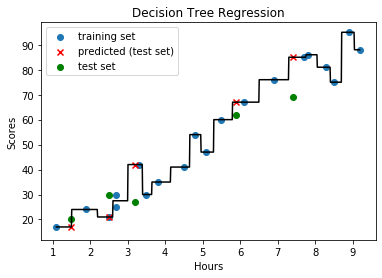

In [15]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_train ,y_train, label='training set')
plt.scatter(x_test, y_pred, color = 'red',marker='x', label='predicted (test set)')
plt.plot(x_grid, regressor.predict(x_grid), color = 'black')
plt.scatter(x_test ,y_test, color='green', label='test set')
plt.title('Decision Tree Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()


In [16]:
print("Comparing actual value of test set with the predicted")
df=pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['Hours','Actual','Predicted'])
df['Deviation']=abs(df['Actual']-df['Predicted'])
df

Comparing actual value of test set with the predicted


,Hours,Actual,Predicted,Deviation
0,1.5,20.0,17.0,3.0
1,3.2,27.0,42.0,15.0
2,7.4,69.0,85.0,16.0
3,2.5,30.0,21.0,9.0
4,5.9,62.0,67.0,5.0


In [17]:
#Predicted score if a student study for 9.25 hrs
hrs=9.25
pred_score=regressor.predict([[hrs]])
print("Hours",hrs)
print("Predicted Score", pred_score)


Hours 9.25
Predicted Score [88.]


In [18]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error

rsm=np.sqrt(mean_squared_error(y_test, y_pred))
mean_abs_error=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error",mean_abs_error)
print("Root Squared Error: ",rsm)

Mean Absolute Error 9.6
Root Squared Error:  10.917875251164945


##### Mean Absolute Error of Decision Tree Regressor Model is greater than the Linear Regression Model so, we will reject this model.

## 3. Random Forest Regression Model (Non Linear Regression Model)

In [19]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 3, random_state = 0 )
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
y_train_pred = regressor.predict(x_train)

In [20]:
y_pred

array([19.33333333, 38.        , 82.        , 22.33333333, 67.66666667])

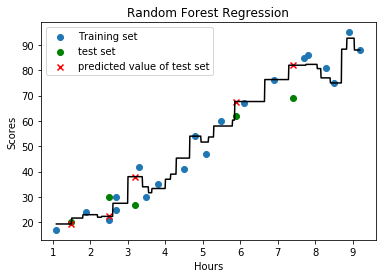

In [21]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_train, y_train, label='Training set')
plt.scatter(x_test, y_test, color = 'green',label='test set')
plt.scatter(x_test,y_pred,marker='x', color='r', label='predicted value of test set')
plt.plot(x_grid, regressor.predict(x_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

#grey line -> predicted values
#red -> training set
#green -> test set

In [22]:
print("Comparing actual value of test set with the predicted")
df=pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['Hours','Actual','Predicted'])
df['Deviation']=abs(df['Actual']-df['Predicted'])
df

Comparing actual value of test set with the predicted


,Hours,Actual,Predicted,Deviation
0,1.5,20.0,19.333333,0.666667
1,3.2,27.0,38.000000,11.000000
2,7.4,69.0,82.000000,13.000000
3,2.5,30.0,22.333333,7.666667
4,5.9,62.0,67.666667,5.666667


In [23]:
#Predicted score if a student study for 9.25 hrs
hrs=9.25
pred_score = regressor.predict([[hrs]])
print("Hours",hrs)
print("Predicted Score", pred_score)


Hours 9.25
Predicted Score [88.]


In [24]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
r2=r2_score(y_test,y_pred)
rsm=np.sqrt(mean_squared_error(y_test, y_pred))
mean_abs_error=mean_absolute_error(y_test,y_pred)
print("R Sq: ", r2)
print("Mean Absolute Error",mean_abs_error)
print("Root Squared Error: ",rsm)

R Sq:  0.8075240594925635
Mean Absolute Error 7.600000000000001
Root Squared Error:  8.73307887670017


##### Mean Absolute Error of Random Forest Regression Model (with 3 trees) is less than Decision Tree Regression Model but more than Simple Linear Regression Model and R square value of this model is also less than SLR Model, hence not the best model.

## 4. Ridge Regularization Regression (Linear Regression Model)

In [25]:
from sklearn.linear_model import Ridge
clf=Ridge(alpha=1.0)
clf.fit(x,y)
Ridge()

y_pred = clf.predict(x_test)
y_pred

array([17.37027938, 33.88124893, 74.67305605, 27.08261441, 60.10455351])

In [26]:
print('Slope of Ridge Regression line:' )
clf.coef_

Slope of Ridge Regression line:


array([9.71233503])

In [27]:
print('Intercept of Ridge Regression line:') 
clf.intercept_

Intercept of Ridge Regression line:


2.801776838256295

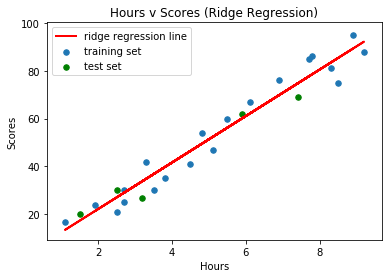

In [28]:
plt.plot(x_train, clf.predict(x_train), linewidth=2, color='red',label='ridge regression line')
plt.scatter(x_train, y_train, s=30, marker='o',label='training set')
plt.scatter(x_test, y_test, s=30, c='green', marker='o',label='test set')
plt.title('Hours v Scores (Ridge Regression)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

#Blue line predicted values
#Red actual data points
#green test set 

In [29]:
print("Comparing actual value of test set with the predicted")
df=pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['Hours','Actual','Predicted'])
df['Deviation']=abs(df['Actual']-df['Predicted'])
df

Comparing actual value of test set with the predicted


,Hours,Actual,Predicted,Deviation
0,1.5,20.0,17.370279,2.629721
1,3.2,27.0,33.881249,6.881249
2,7.4,69.0,74.673056,5.673056
3,2.5,30.0,27.082614,2.917386
4,5.9,62.0,60.104554,1.895446


In [30]:
#Predicted score if a student study for 9.25 hrs
hrs=9.25
pred_score=clf.predict([[hrs]])
print("Hours",hrs)
print("Predicted Score", pred_score)

Hours 9.25
Predicted Score [92.64087585]


In [31]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
r2=r2_score(y_test,y_pred)
rsm=np.sqrt(mean_squared_error(y_test, y_pred))
mean_abs_error=mean_absolute_error(y_test,y_pred)
print("R Sq: ", r2)
print("Mean Absolute Error",mean_abs_error)
print("Root Squared Error: ",rsm)

R Sq:  0.9502551794995725
Mean Absolute Error 3.9993715363080624
Root Squared Error:  4.439694547498668


##### Mean Absolute Error and Root squared error are lower as compare to above model and r2 value is also slightly greater than Linear Regression Model.

## 5. Lasso Regularization  (Linear Regression Model)

Lasso Regression is very similar to Ridge Regression, but it is little better at reducing the variance in the models that contain a lot of useless variable. Since out data consists of only two variables, not much diiference can be seen.

In [32]:
from sklearn.linear_model import Lasso
clf=Lasso(alpha=0.1)
clf.fit(x,y)
Lasso(alpha=0.1)

y_pred = clf.predict(x_test)
y_pred

array([17.20475421, 33.79584699, 74.78560562, 26.96422055, 60.14640611])

In [33]:
print('Slope of Lasso Regression line:' )
clf.coef_

Slope of Lasso Regression line:


array([9.75946634])

In [34]:
print('Intercept of Lasso Regression line:') 
clf.intercept_

Intercept of Lasso Regression line:


2.56555470167239

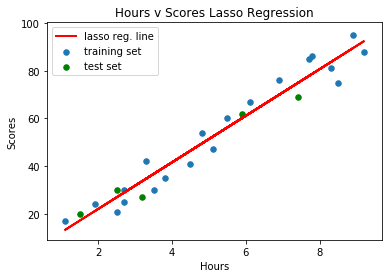

In [35]:
plt.plot(x_train, clf.predict(x_train), linewidth=2, color='red',label='lasso reg. line')
plt.scatter(x_train, y_train, s=30, marker='o',label='training set')
plt.scatter(x_test, y_test, s=30, c='green', marker='o',label='test set')
plt.title('Hours v Scores Lasso Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

#Blue line predicted values
#Red actual data points of training set
#Green test set

In [36]:
print("Comparing actual value of test set with the predicted")
df=pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['Hours','Actual','Predicted'])
df['Deviation']=abs(df['Actual']-df['Predicted'])
df

Comparing actual value of test set with the predicted


,Hours,Actual,Predicted,Deviation
0,1.5,20.0,17.204754,2.795246
1,3.2,27.0,33.795847,6.795847
2,7.4,69.0,74.785606,5.785606
3,2.5,30.0,26.964221,3.035779
4,5.9,62.0,60.146406,1.853594


In [37]:
#Predicted score if a student study for 9.25 hrs
hrs=9.25
pred_score=clf.predict([[hrs]])
print("Hours",hrs)
print("Predicted Score", pred_score)

Hours 9.25
Predicted Score [92.84061835]


In [38]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
r2=r2_score(y_test,y_pred)
rsm=np.sqrt(mean_squared_error(y_test, y_pred))
mean_abs_error=mean_absolute_error(y_test,y_pred)
print("R Sq: ", r2)
print("Mean Absolute Error",mean_abs_error)
print("Root Squared Error: ",rsm)

R Sq:  0.9494639940937134
Mean Absolute Error 4.053214347328307
Root Squared Error:  4.474861671639359


##### MAE and RSE is slightly greater and R sq value is less than Ridge Regression Model.

## 6. ElasticNet (Linear Regression Mode)

In [39]:
from sklearn.linear_model import ElasticNet
clf=ElasticNet(alpha=0.1)
clf.fit(x,y)
ElasticNet(alpha=0.1)

y_pred = clf.predict(x_test)
y_pred

array([17.45400852, 33.92444859, 74.61612405, 27.14250268, 60.08338281])

In [40]:
print('Slope of ElasticNet Regression line:' )
clf.coef_

Slope of ElasticNet Regression line:


array([9.68849416])

In [41]:
print('Intercept of Lasso Regression line:') 
clf.intercept_

Intercept of Lasso Regression line:


2.9212672839137994

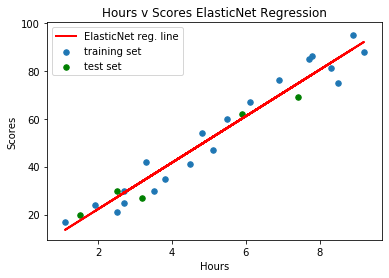

In [42]:
plt.plot(x_train, clf.predict(x_train), linewidth=2, color='red',label='ElasticNet reg. line')
plt.scatter(x_train, y_train, s=30, marker='o',label='training set')
plt.scatter(x_test, y_test, s=30, c='green', marker='o',label='test set')
plt.title('Hours v Scores ElasticNet Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

#Blue line predicted values
#Red actual data points of training set
#Green test set

In [43]:
print("Comparing actual value of test set with the predicted")
df=pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['Hours','Actual','Predicted'])
df['Deviation']=abs(df['Actual']-df['Predicted'])
df

Comparing actual value of test set with the predicted


,Hours,Actual,Predicted,Deviation
0,1.5,20.0,17.454009,2.545991
1,3.2,27.0,33.924449,6.924449
2,7.4,69.0,74.616124,5.616124
3,2.5,30.0,27.142503,2.857497
4,5.9,62.0,60.083383,1.916617


In [44]:
#Predicted score if a student study for 9.25 hrs
hrs=9.25
pred_score=clf.predict([[hrs]])
print("Hours",hrs)
print("Predicted Score", pred_score)

Hours 9.25
Predicted Score [92.53983824]


In [45]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
r2=r2_score(y_test,y_pred)
rsm=np.sqrt(mean_squared_error(y_test, y_pred))
mean_abs_error=mean_absolute_error(y_test,y_pred)
print("R Sq: ", r2)
print("Mean Absolute Error",mean_abs_error)
print("Root Squared Error: ",rsm)

R Sq:  0.9506311212563422
Mean Absolute Error 3.972135725230821
Root Squared Error:  4.422886445906901


##### ElasticNet combines Lasso Regression and Ridge Regression to give best of both models. The error is lowest in comparision with other 5 model.

### Conclusion

Best model for predicting the marks based on the number of hours of study (according to dataset given) is ElesticNet.
So, if # hrs of study= 9.25, the predicted marks would be 92.5.